### Trabalho de validação de algoritmos de clusterização

O presente trabalho visa demonstrar as competências obtidas durante a disciplina ministrada.

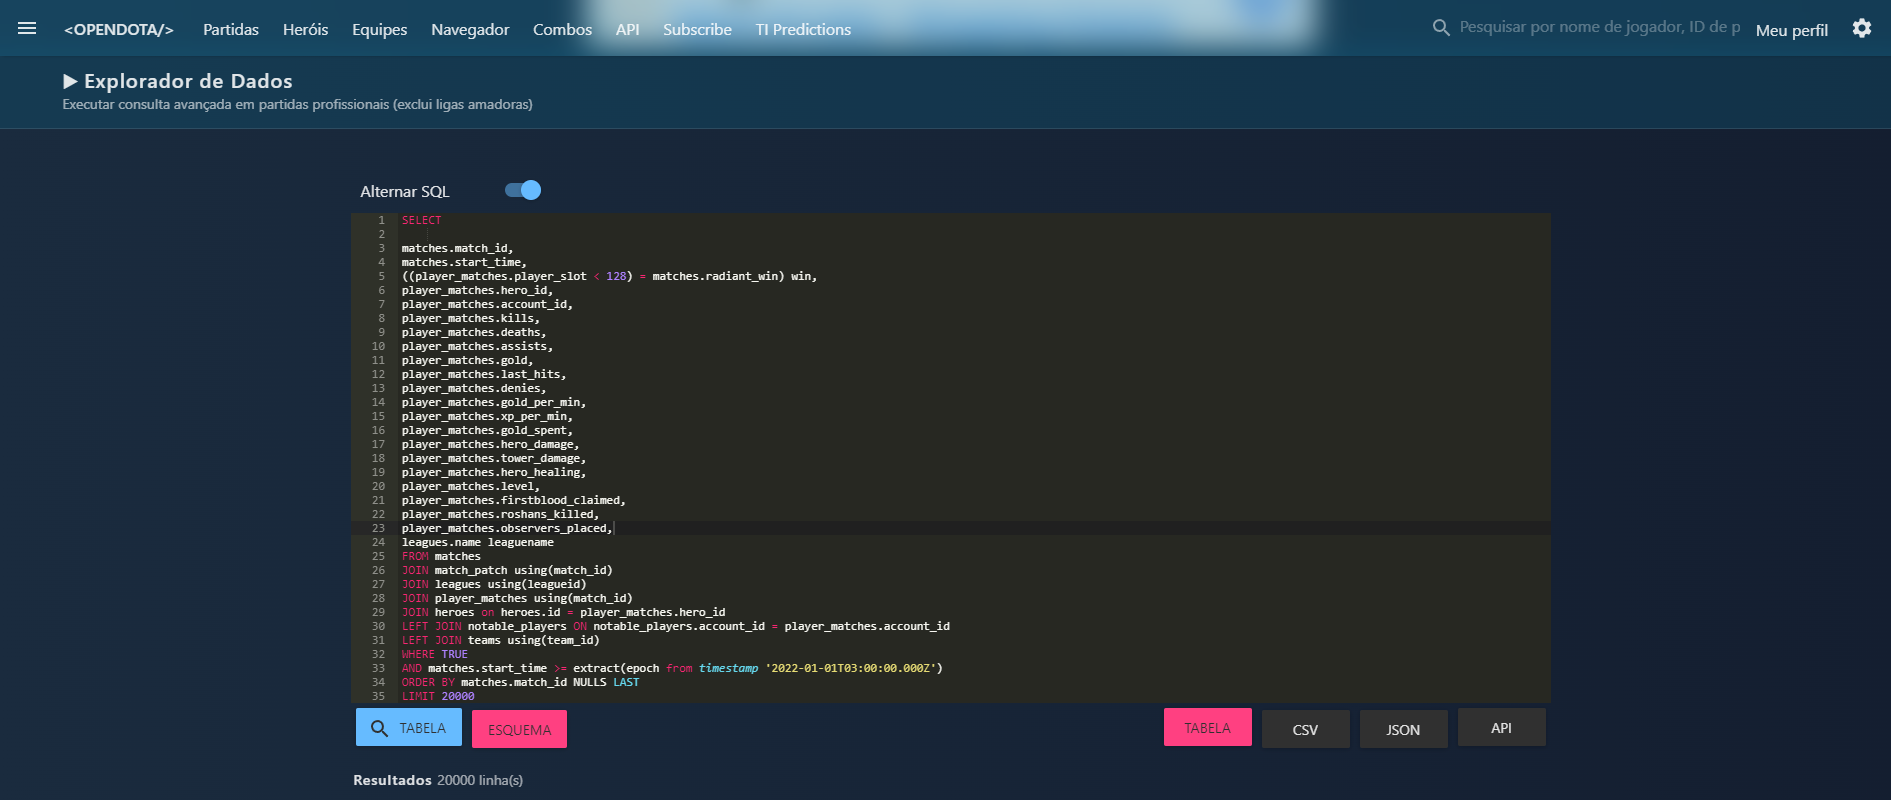




In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
dota_data = pd.read_csv("../../dataset/dota2.csv")
dota_data.head()

match_id  start_time   win  hero_id  account_id  kills  deaths  assists  \
0  6352676609  1641014016  True      106   360648679     12       8       19   
1  6352676609  1641014016  True       88   318371533      5      13       19   
2  6352676609  1641014016  True      121   318286721      3      11       29   
3  6352676609  1641014016  True       43   104504914      7       8       17   
4  6352676609  1641014016  True       44  1125296112     18       5       17   

   gold  last_hits  ...  xp_per_min  gold_spent  hero_damage  tower_damage  \
0  3143        439  ...         751       29945        38516          1621   
1   741         45  ...         602       12570        19906            39   
2  1882         71  ...         594       20710        14355            83   
3  1422        225  ...         661       21005        22345          2181   
4   586        430  ...         770       32815        55770          4103   

   hero_healing  level  firstblood_claimed  roshans_killed  observers_placed  \
0           285     28                 0.0             0.0               1.0   
1             8     25                 0.0             1.0               4.0   
2          2455     25                 0.0             0.0              18.0   
3             0     26                 0.0             1.0               0.0   
4           110     29                 0.0             0.0               0.0   

          leaguename  
0  Asia New Star Cup  
1  Asia New Star Cup  
2  Asia New Star Cup  
3  Asia New Star Cup  
4  Asia New Star Cup  

[5 rows x 22 columns]

In [99]:
dota_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            20000 non-null  int64  
 1   start_time          20000 non-null  int64  
 2   win                 20000 non-null  bool   
 3   hero_id             20000 non-null  int64  
 4   account_id          20000 non-null  int64  
 5   kills               20000 non-null  int64  
 6   deaths              20000 non-null  int64  
 7   assists             20000 non-null  int64  
 8   gold                20000 non-null  int64  
 9   last_hits           20000 non-null  int64  
 10  denies              20000 non-null  int64  
 11  gold_per_min        20000 non-null  int64  
 12  xp_per_min          20000 non-null  int64  
 13  gold_spent          20000 non-null  int64  
 14  hero_damage         20000 non-null  int64  
 15  tower_damage        20000 non-null  int64  
 16  hero

In [100]:
dota_data.describe()

match_id    start_time       hero_id    account_id         kills  \
count  2.000000e+04  2.000000e+04  20000.000000  2.000000e+04  20000.000000   
mean   6.388825e+09  1.642742e+09     64.486150  4.858906e+08      5.921150   
std    2.001241e+07  9.661890e+05     38.822333  4.442364e+08      4.693616   
min    6.352677e+09  1.641014e+09      1.000000  5.150808e+06      0.000000   
25%    6.371437e+09  1.641903e+09     34.000000  1.421393e+08      2.000000   
50%    6.387527e+09  1.642687e+09     63.000000  2.375786e+08      5.000000   
75%    6.406495e+09  1.643570e+09     95.000000  1.002244e+09      8.000000   
max    6.423834e+09  1.644451e+09    135.000000  1.281315e+09     44.000000   

             deaths       assists         gold     last_hits        denies  \
count  20000.000000  20000.000000  20000.00000  20000.000000  20000.000000   
mean       6.035200     12.030850   1748.82435    177.739950      6.688000   
std        3.703721      6.968517   1677.83965    144.320768      6.070486   
min        0.000000      0.000000      0.00000      0.000000      0.000000   
25%        3.000000      7.000000    655.00000     49.000000      2.000000   
50%        6.000000     11.000000   1271.00000    154.000000      5.000000   
75%        8.000000     16.000000   2281.00000    269.000000     10.000000   
max       27.000000     45.000000  40857.00000   1065.000000     68.000000   

       gold_per_min    xp_per_min    gold_spent    hero_damage  tower_damage  \
count  20000.000000  20000.000000  20000.000000   20000.000000   20000.00000   
mean     441.546050    559.725550  13771.300750   18990.270150    2445.61860   
std      168.384648    190.051862   7032.725957   12220.153247    4253.06233   
min      120.000000     50.000000      0.000000       0.000000       0.00000   
25%      303.000000    424.000000   8585.000000   10603.000000      94.00000   
50%      422.000000    556.000000  12420.000000   16029.500000     631.00000   
75%      566.000000    702.000000  17925.000000   24513.500000    2574.25000   
max     1032.000000   1164.000000  62765.000000  213881.000000   34702.00000   

       hero_healing         level  firstblood_claimed  roshans_killed  \
count  20000.000000  20000.000000        19930.000000    19930.000000   
mean     728.921350     19.789950            0.095886        0.166734   
std     2327.023767      5.045156            0.294442        0.442428   
min        0.000000      4.000000            0.000000        0.000000   
25%        0.000000     16.000000            0.000000        0.000000   
50%        0.000000     20.000000            0.000000        0.000000   
75%      400.000000     24.000000            0.000000        0.000000   
max    59249.000000     30.000000            1.000000        4.000000   

       observers_placed  
count      19930.000000  
mean           3.153487  
std            4.300212  
min            0.000000  
25%            0.000000  
50%            2.000000  
75%            4.000000  
max           32.000000

In [101]:
dota_data.drop(["match_id", "start_time", "account_id", "leaguename"], axis=1, inplace=True)

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)


clean_dataset(dota_data)
print(dota_data.isna().sum())
print(dota_data.isnull().sum())

def win_to_numeric(win_status):
  if win_status is True:
    return 1
  else:
    return 0


dota_data["win"] = dota_data["win"].apply(win_to_numeric)
dota_data.shape

win                   0
hero_id               0
kills                 0
deaths                0
assists               0
gold                  0
last_hits             0
denies                0
gold_per_min          0
xp_per_min            0
gold_spent            0
hero_damage           0
tower_damage          0
hero_healing          0
level                 0
firstblood_claimed    0
roshans_killed        0
observers_placed      0
dtype: int64
win                   0
hero_id               0
kills                 0
deaths                0
assists               0
gold                  0
last_hits             0
denies                0
gold_per_min          0
xp_per_min            0
gold_spent            0
hero_damage           0
tower_damage          0
hero_healing          0
level                 0
firstblood_claimed    0
roshans_killed        0
observers_placed      0
dtype: int64


/tmp/ipykernel_7874/2962943811.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)


(19930, 18)

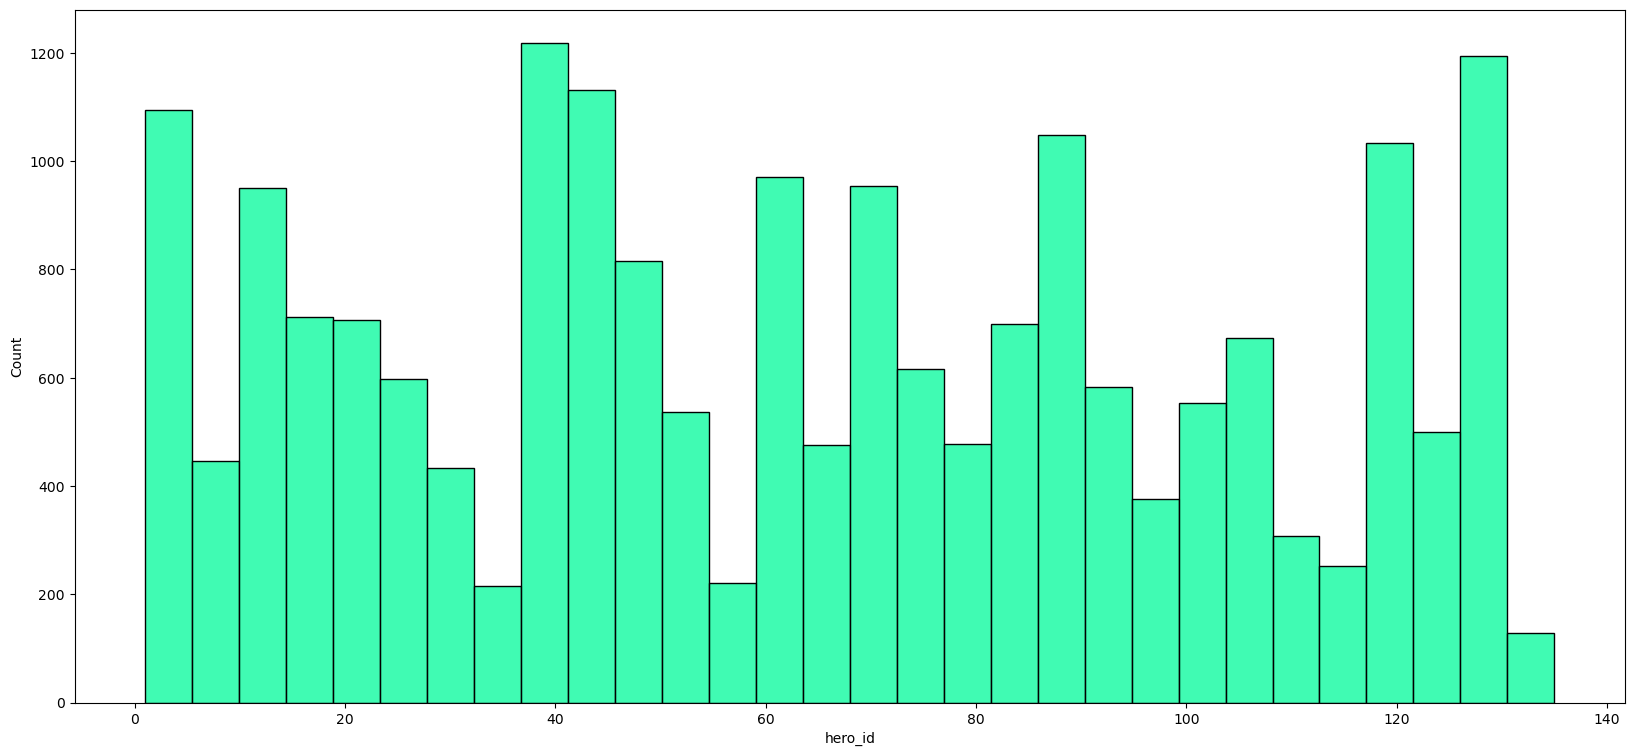

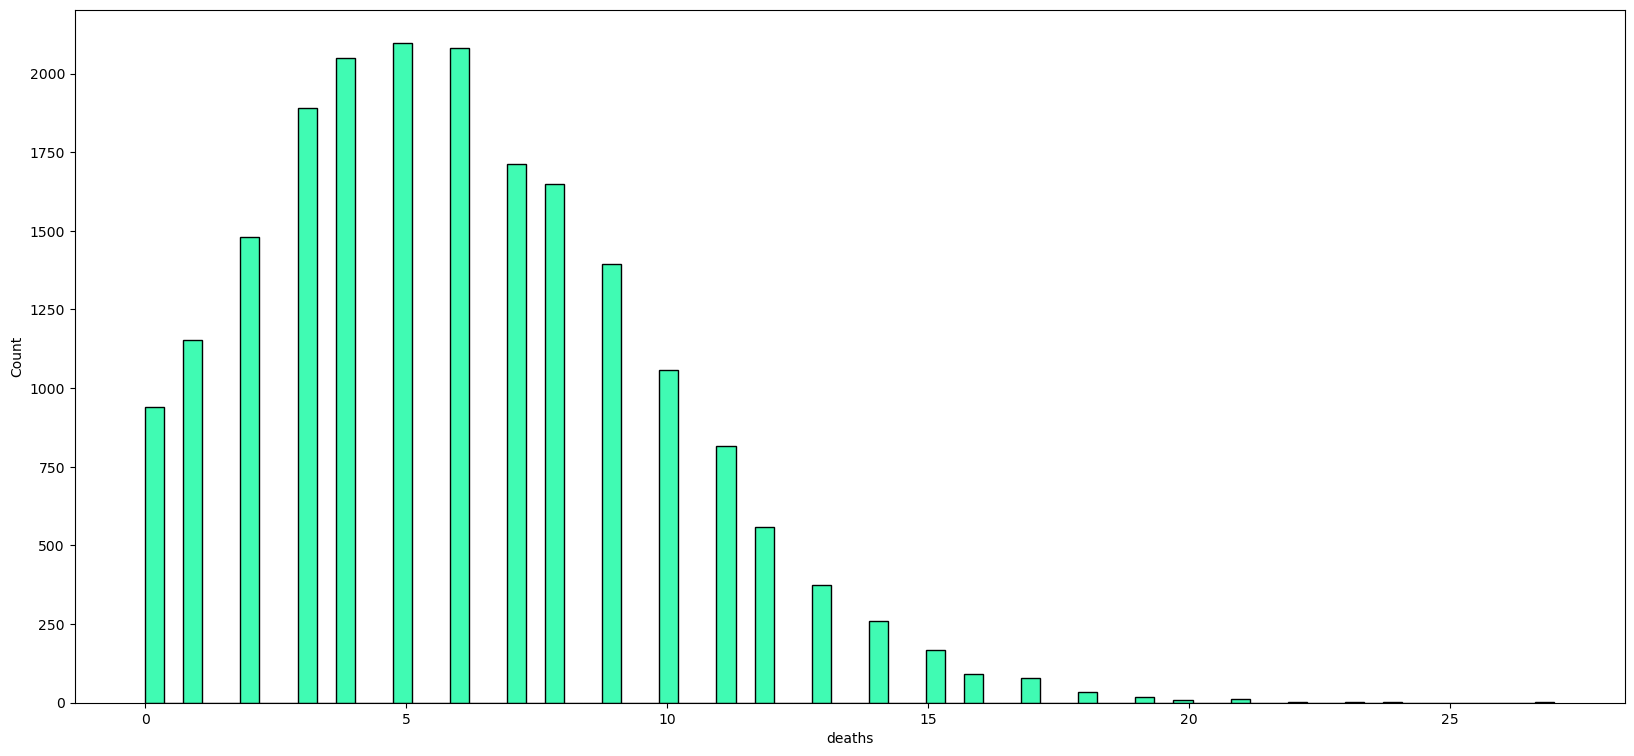

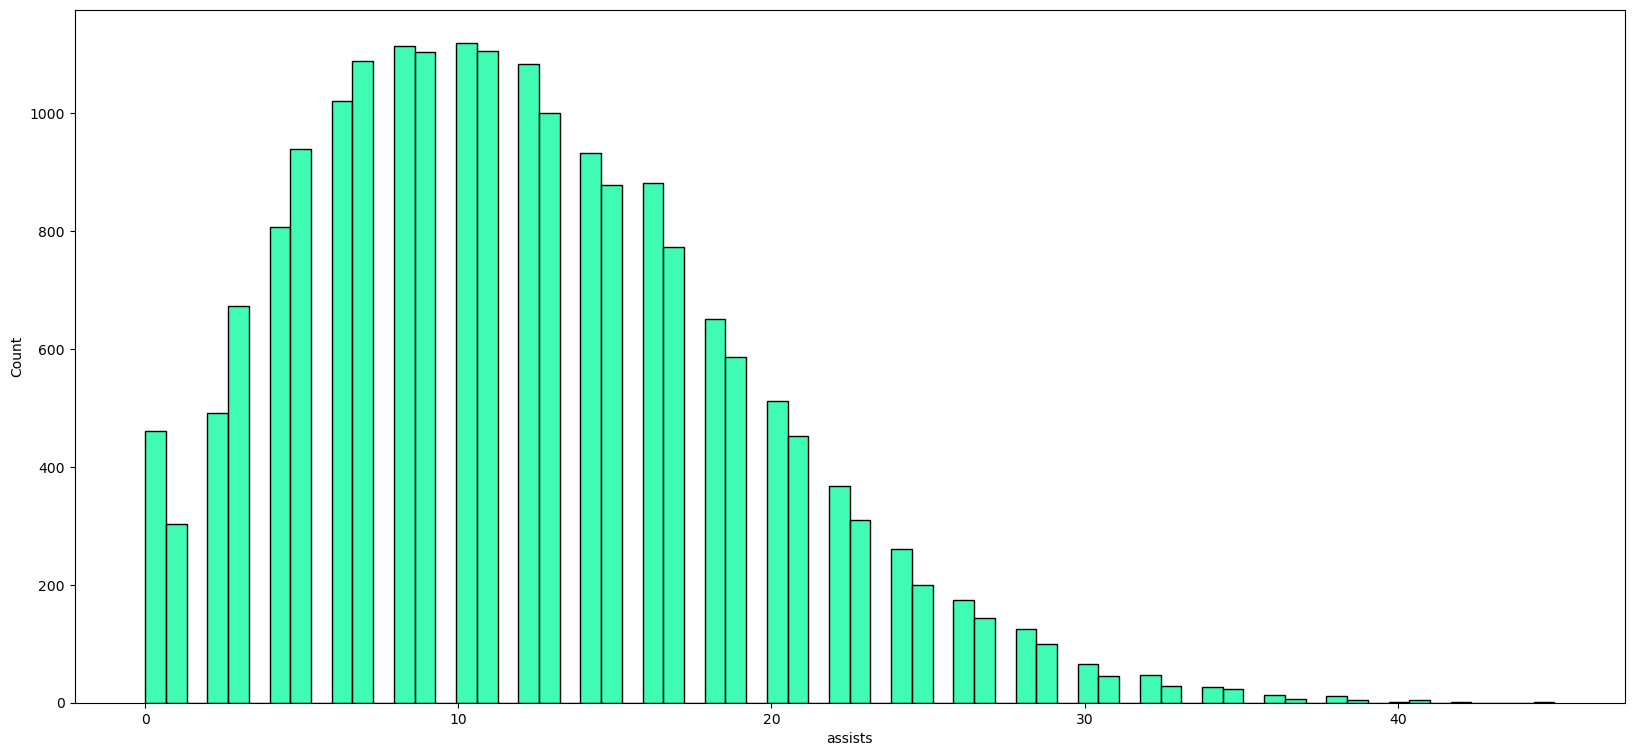

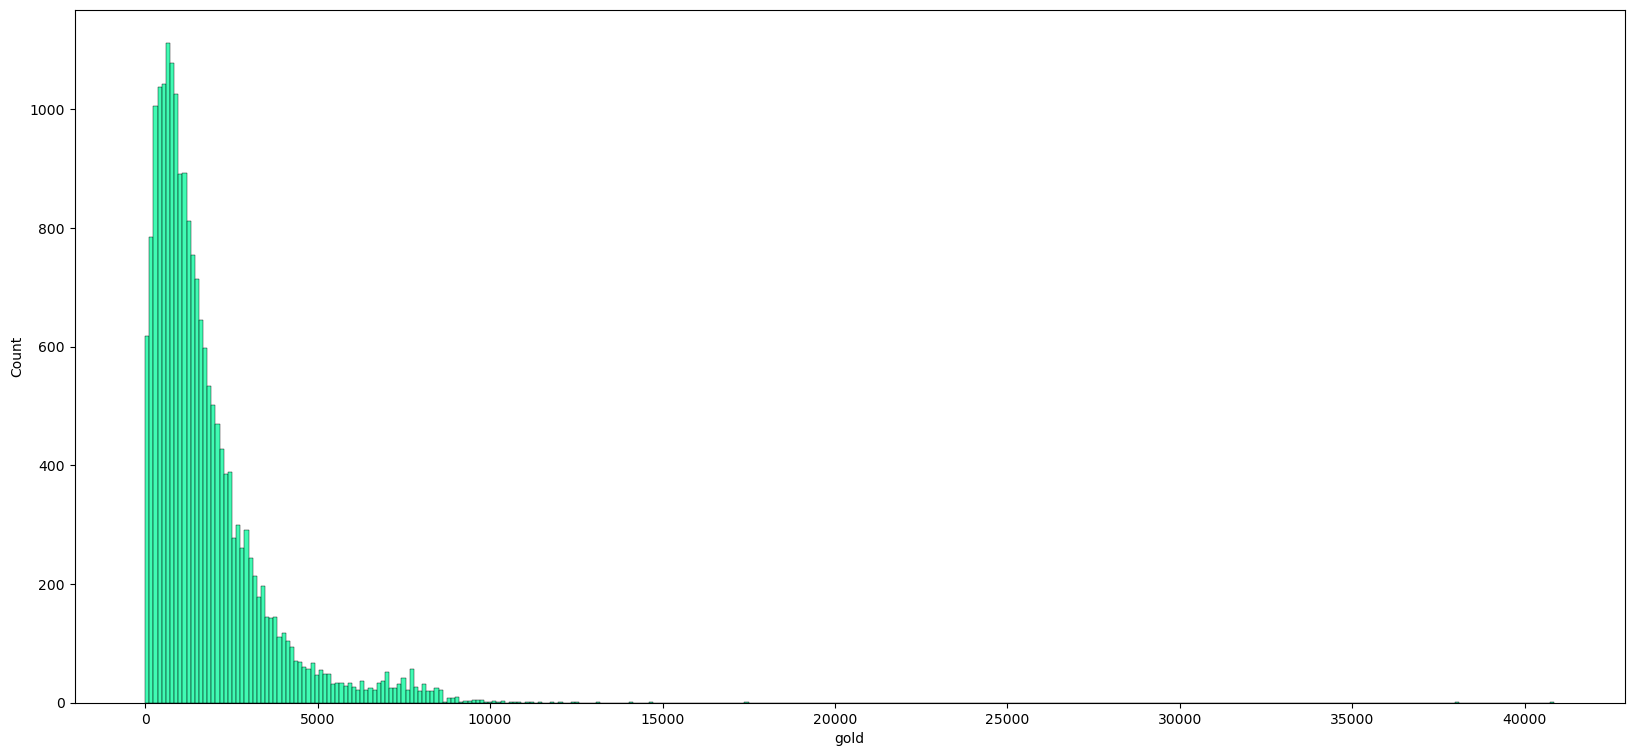

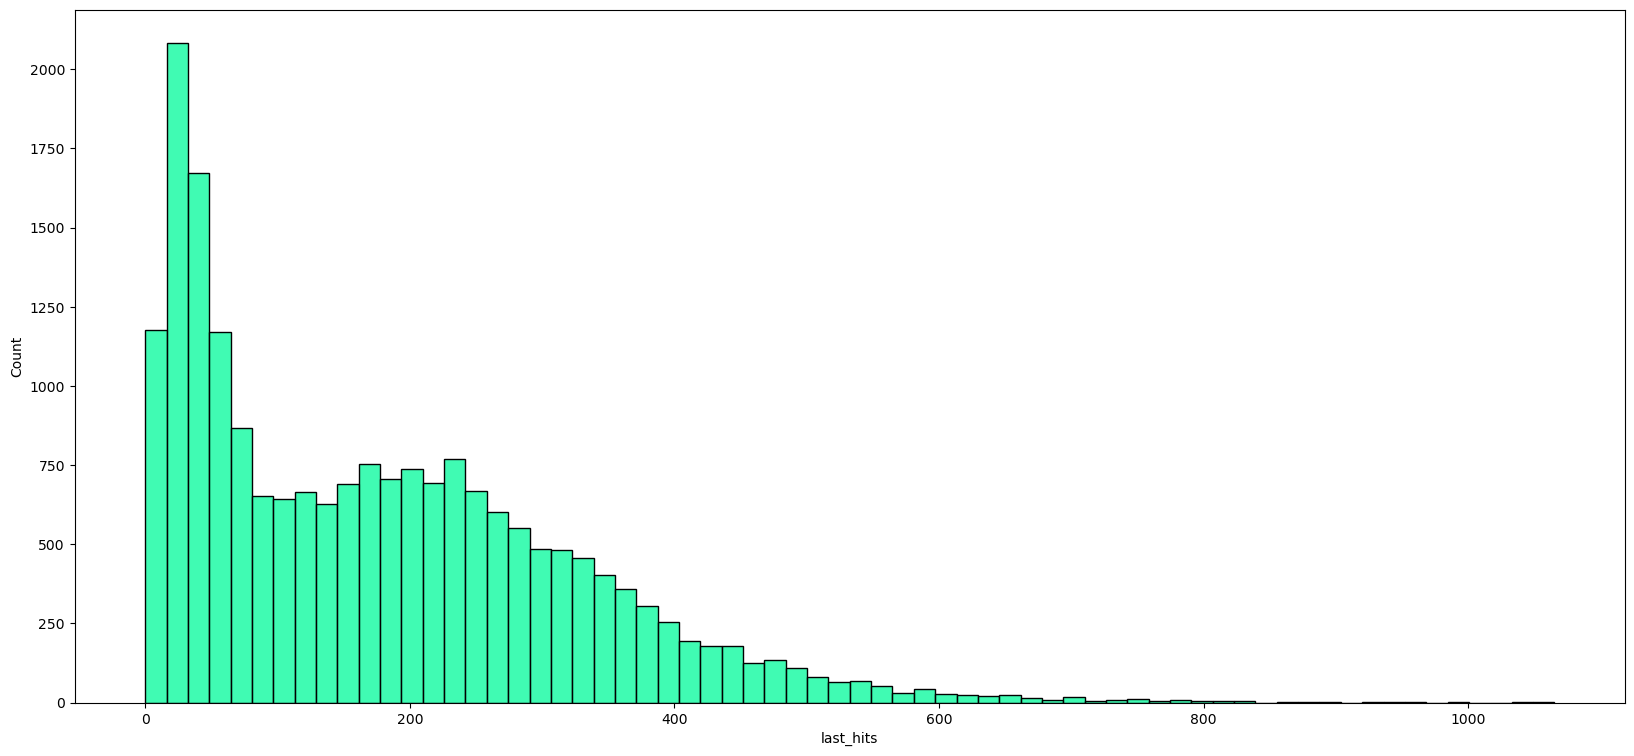

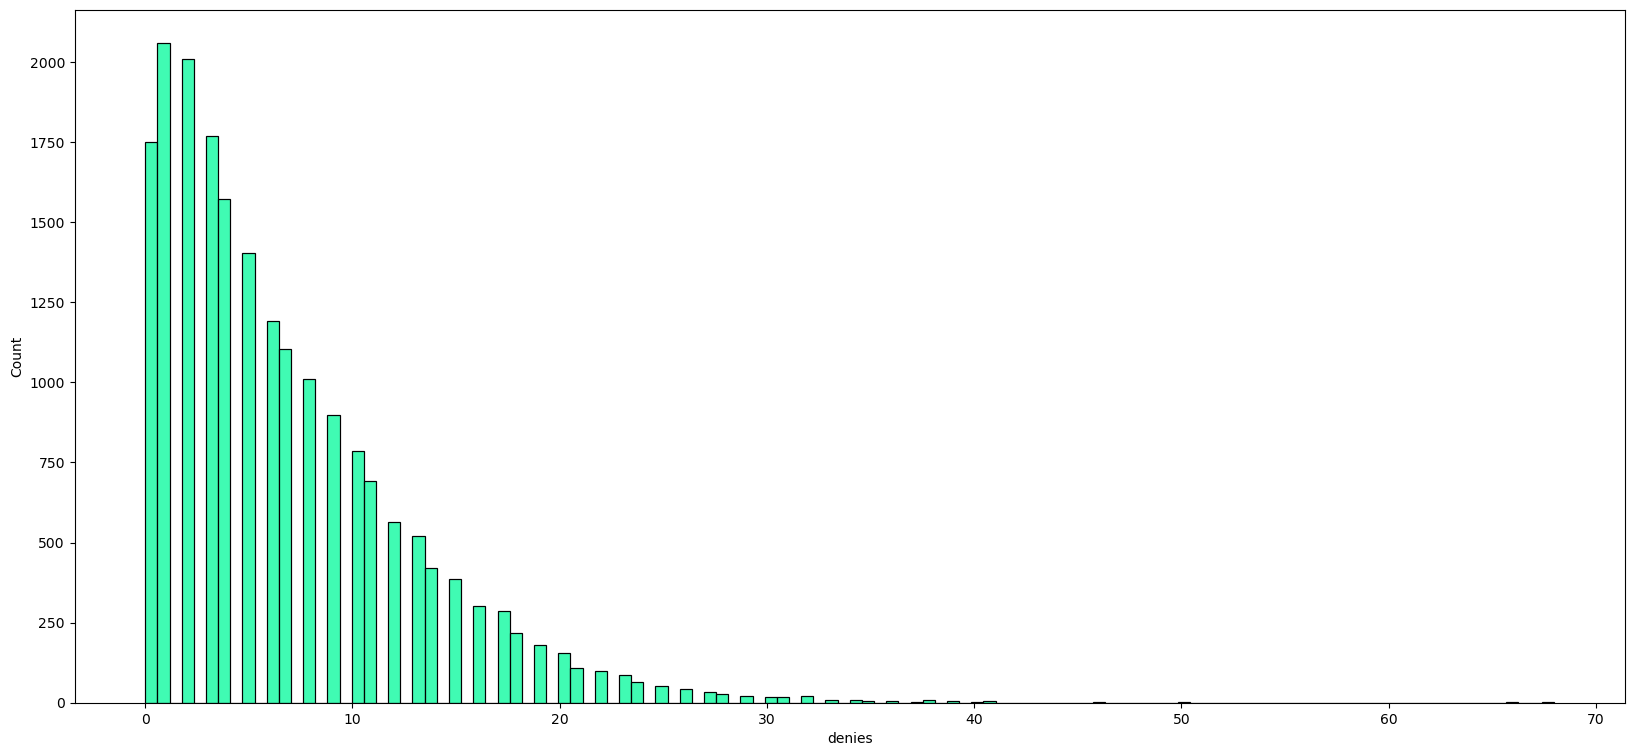

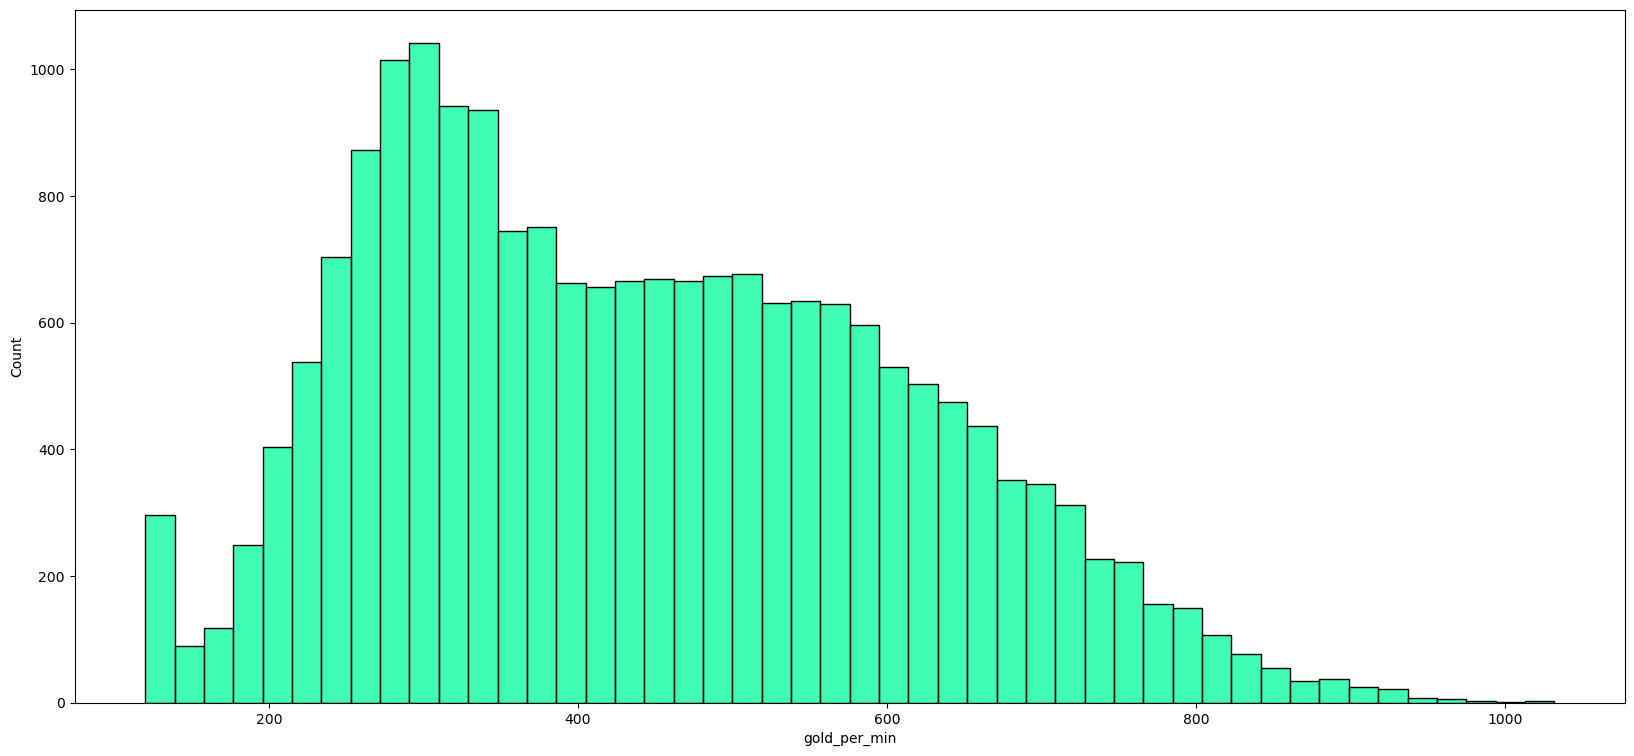

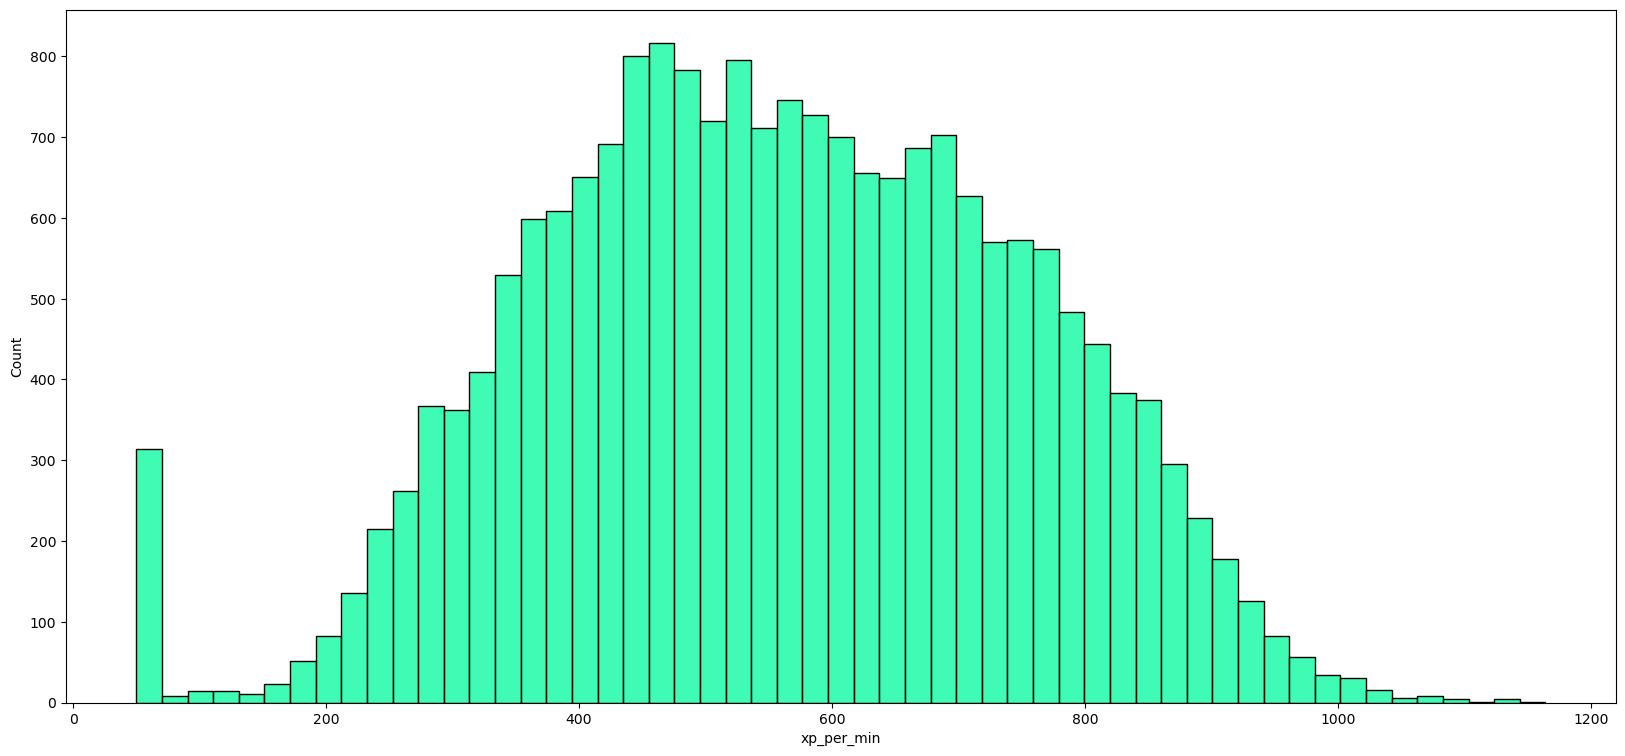

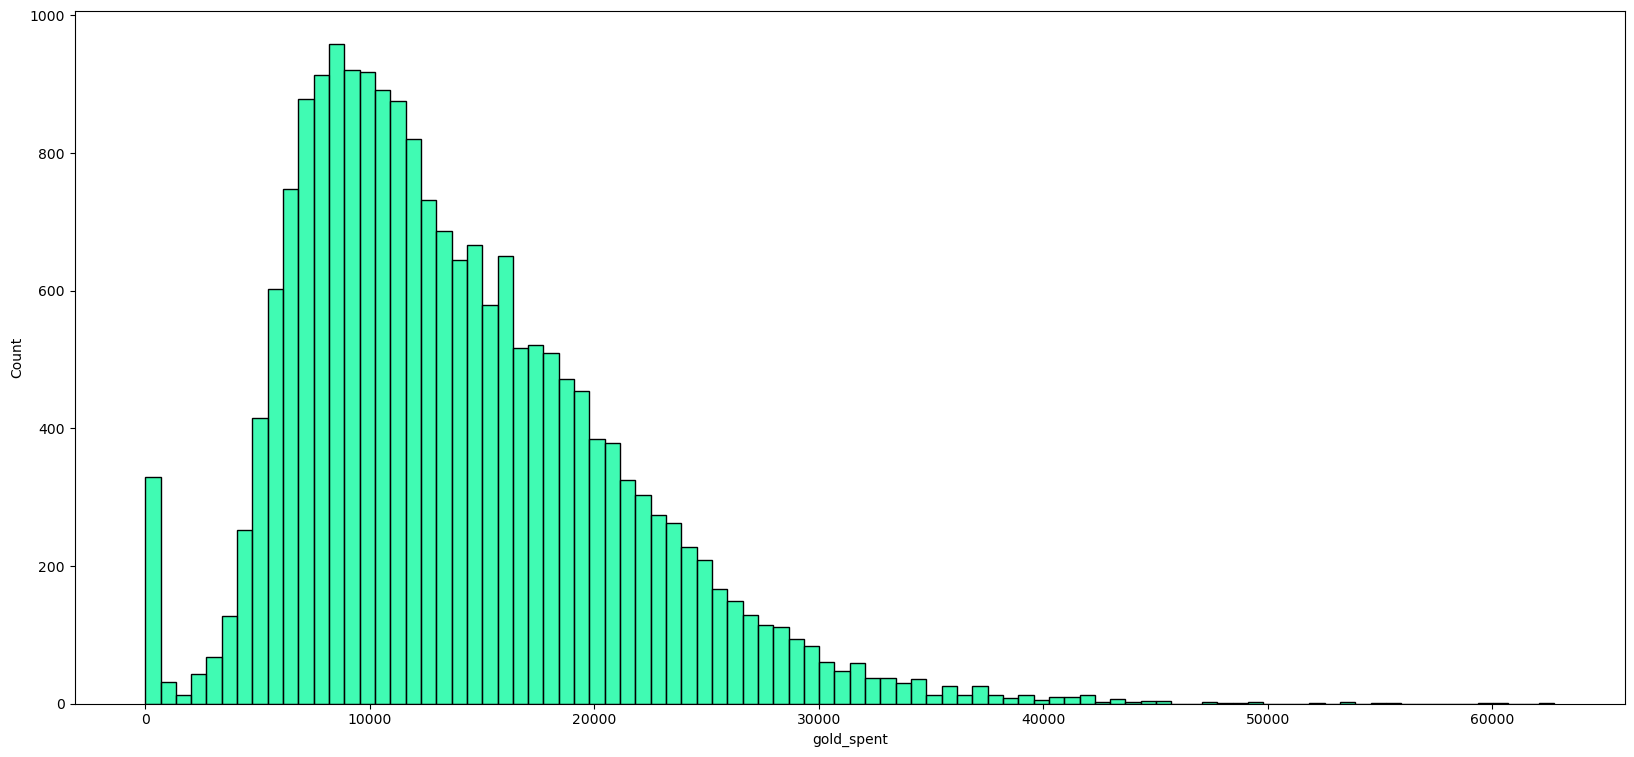

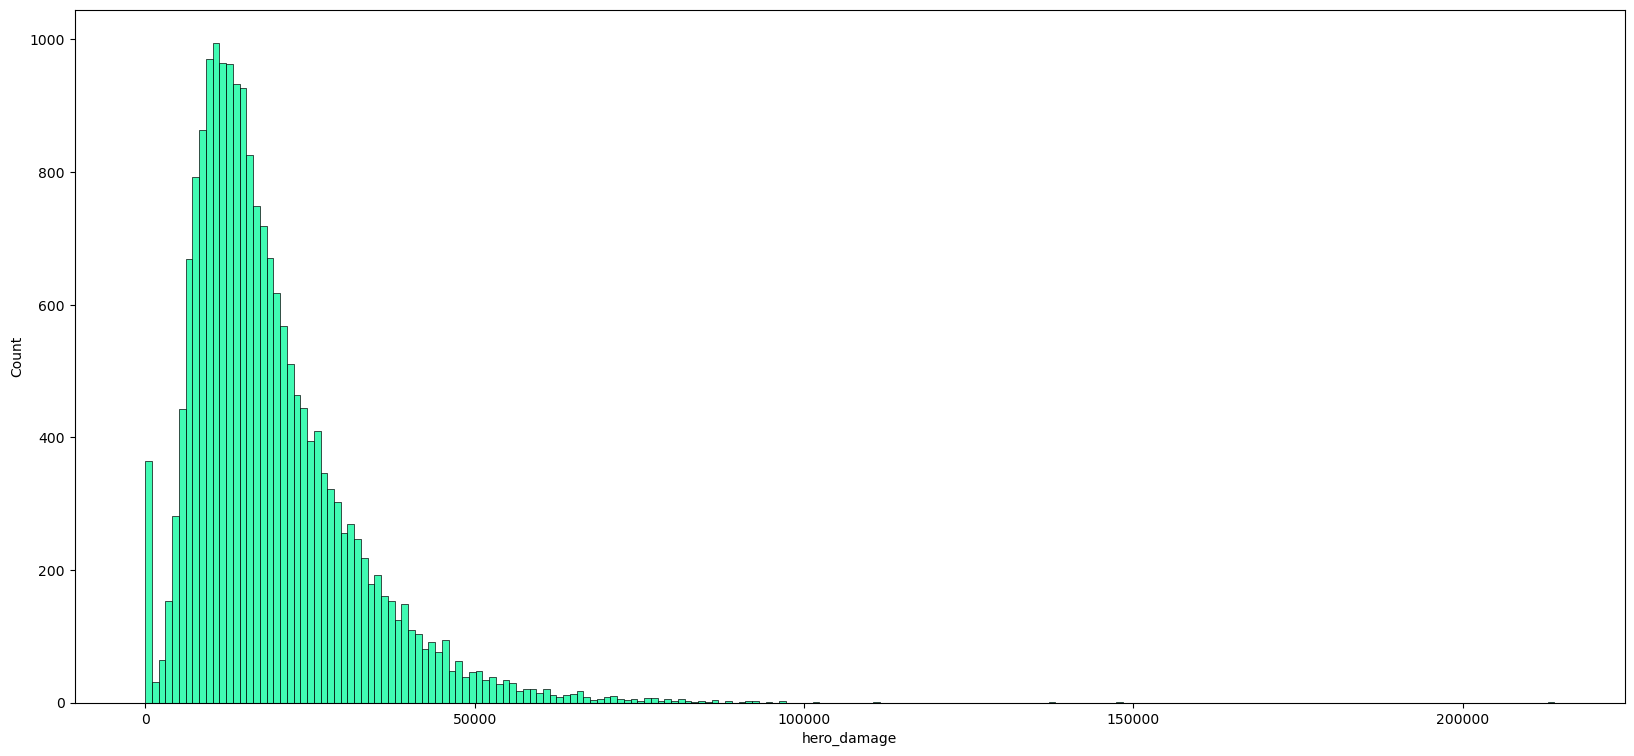

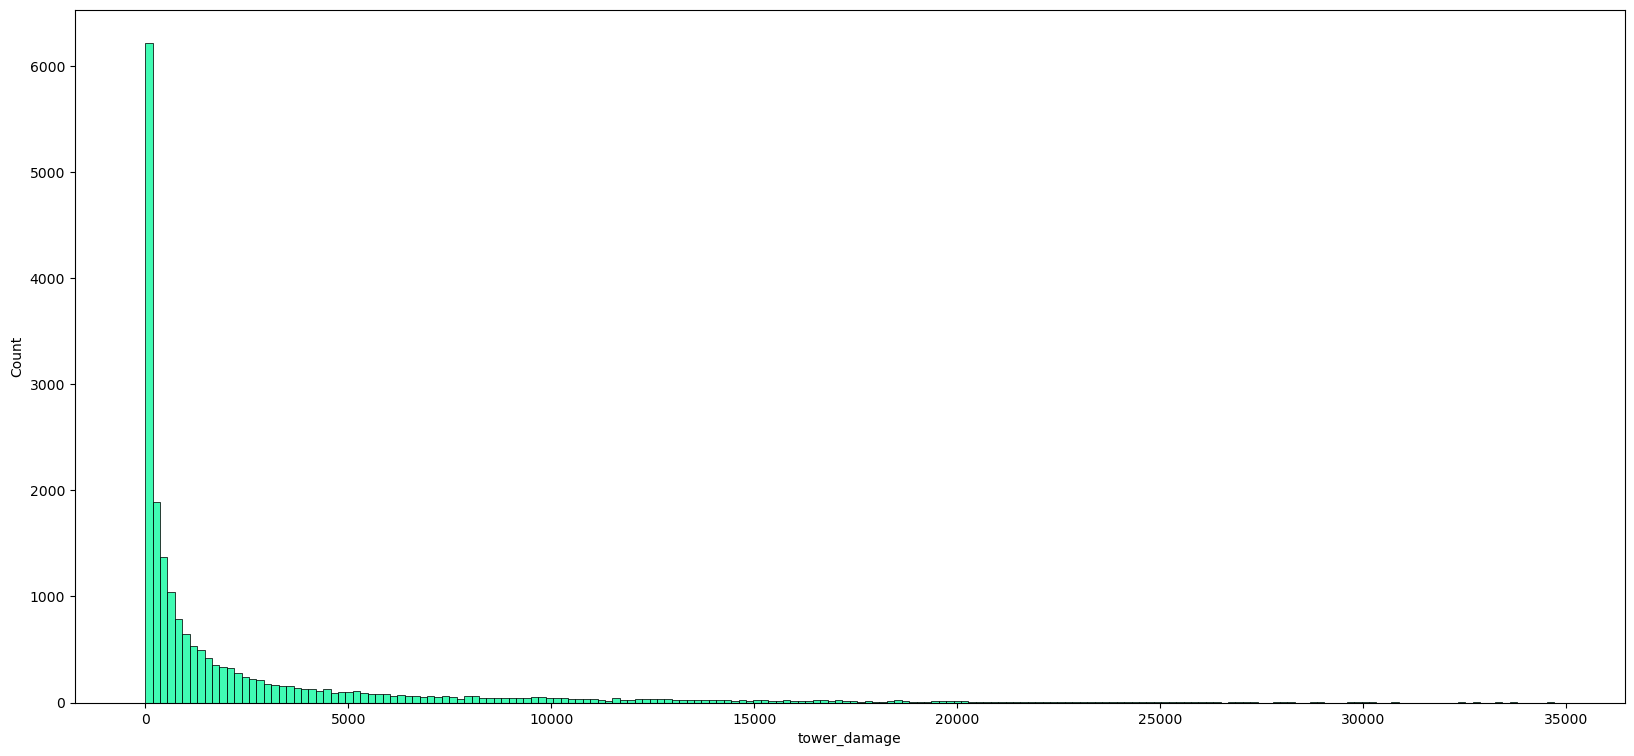

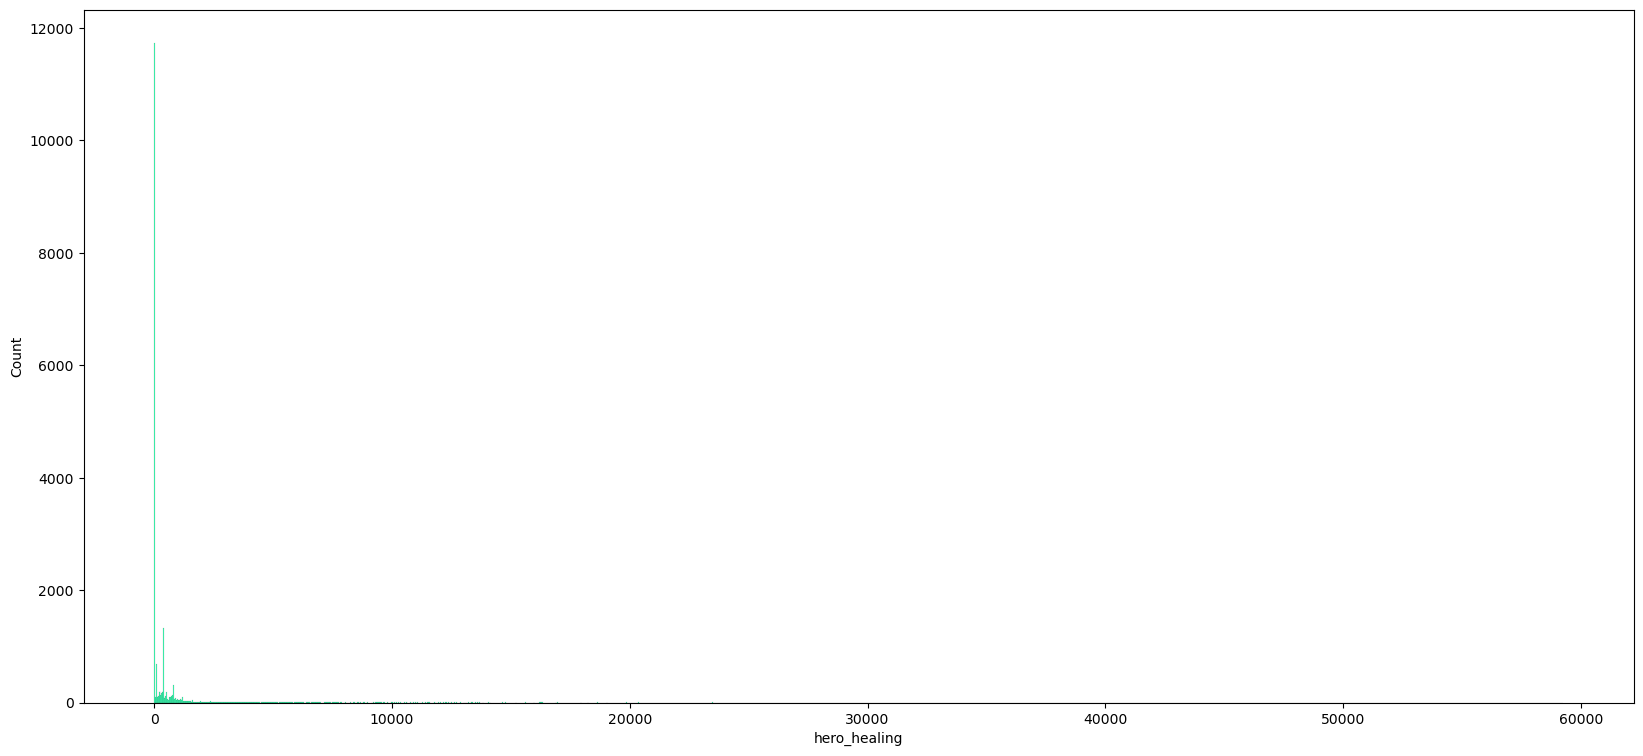

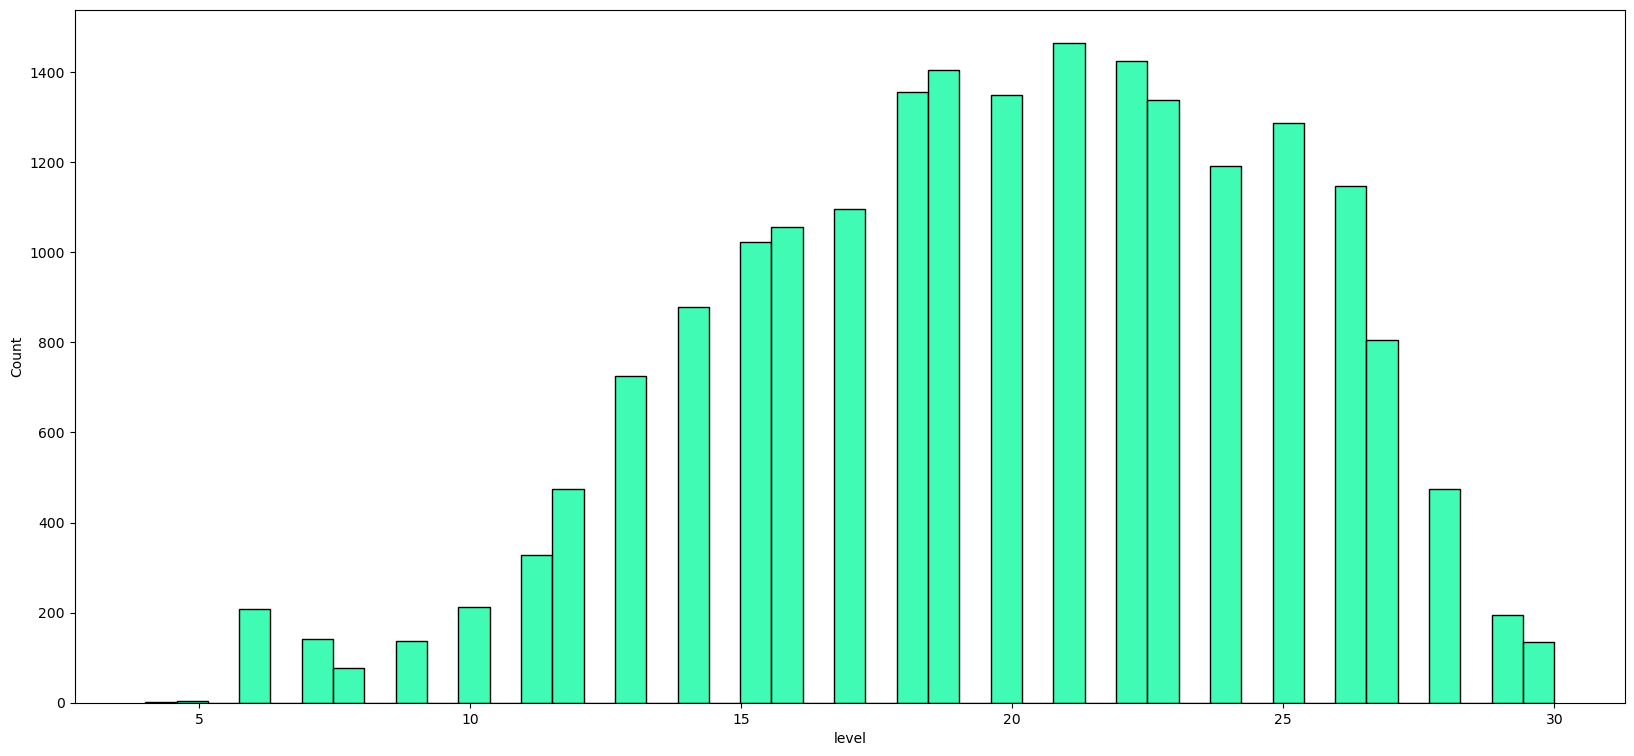

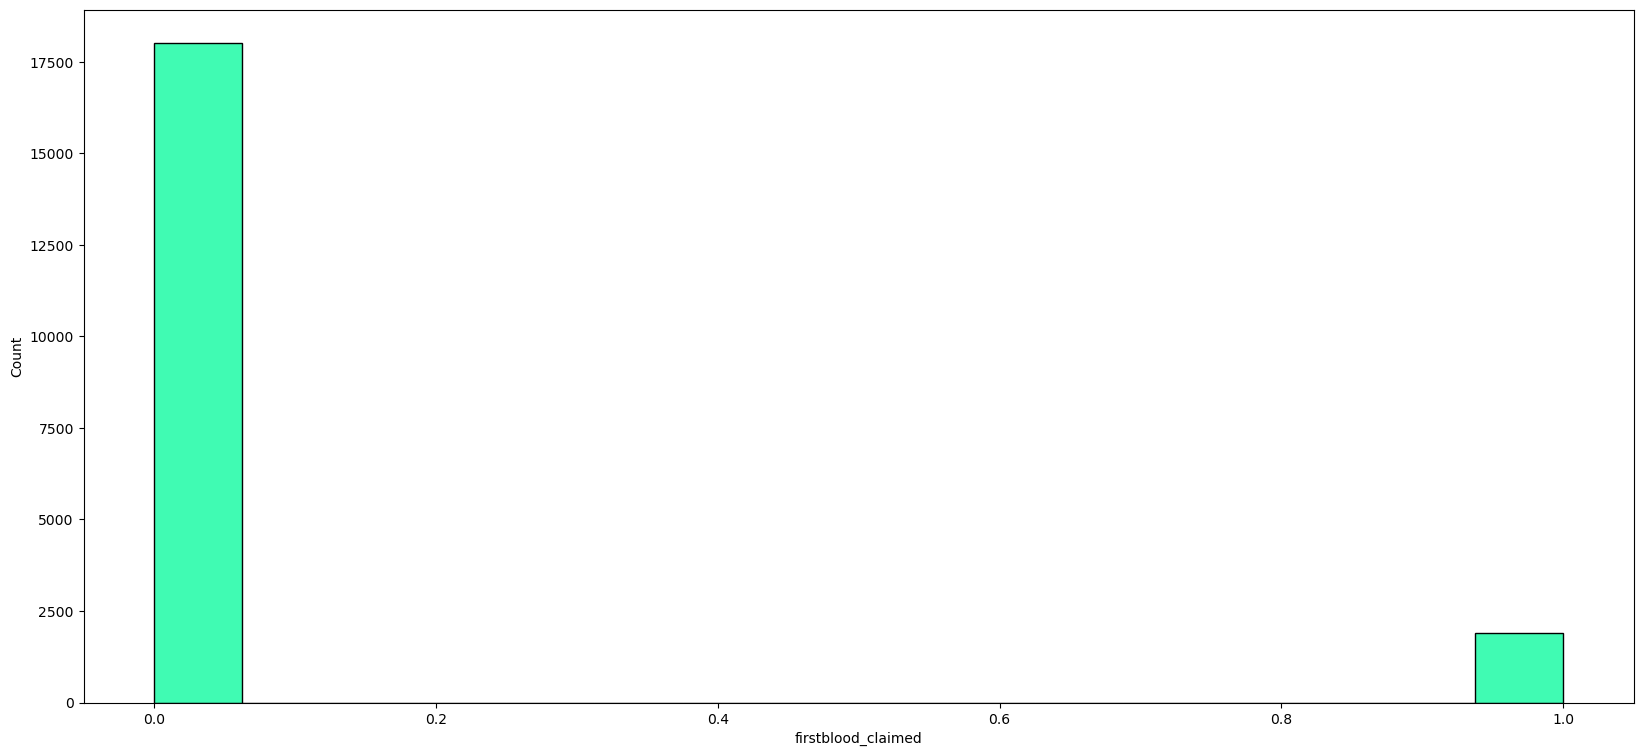

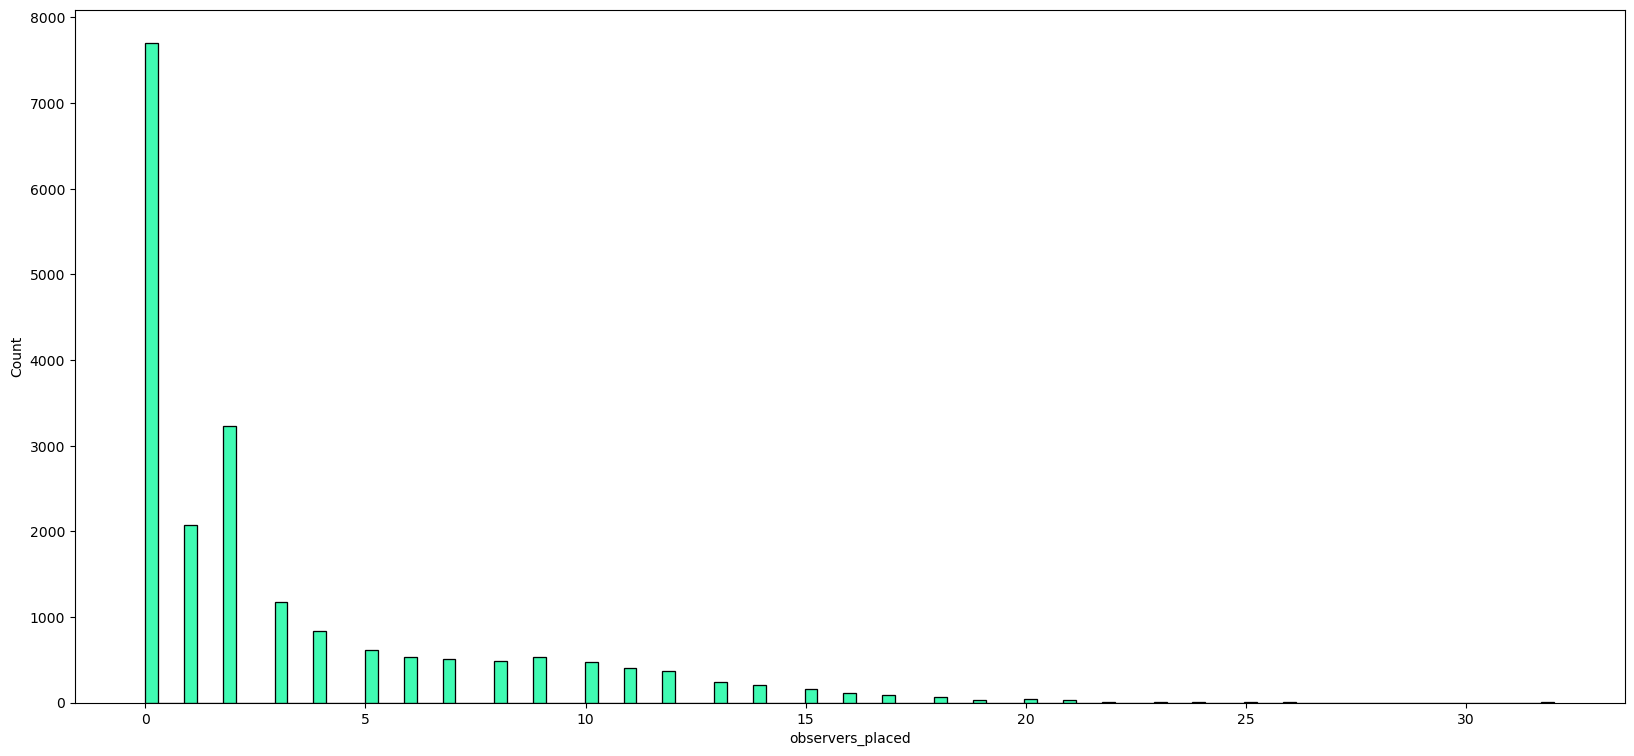

In [102]:
for col in dota_data.columns:
    plt.figure(figsize=(20,9))
    sns.histplot(dota_data[col], color="mediumspringgreen")
    plt.show()

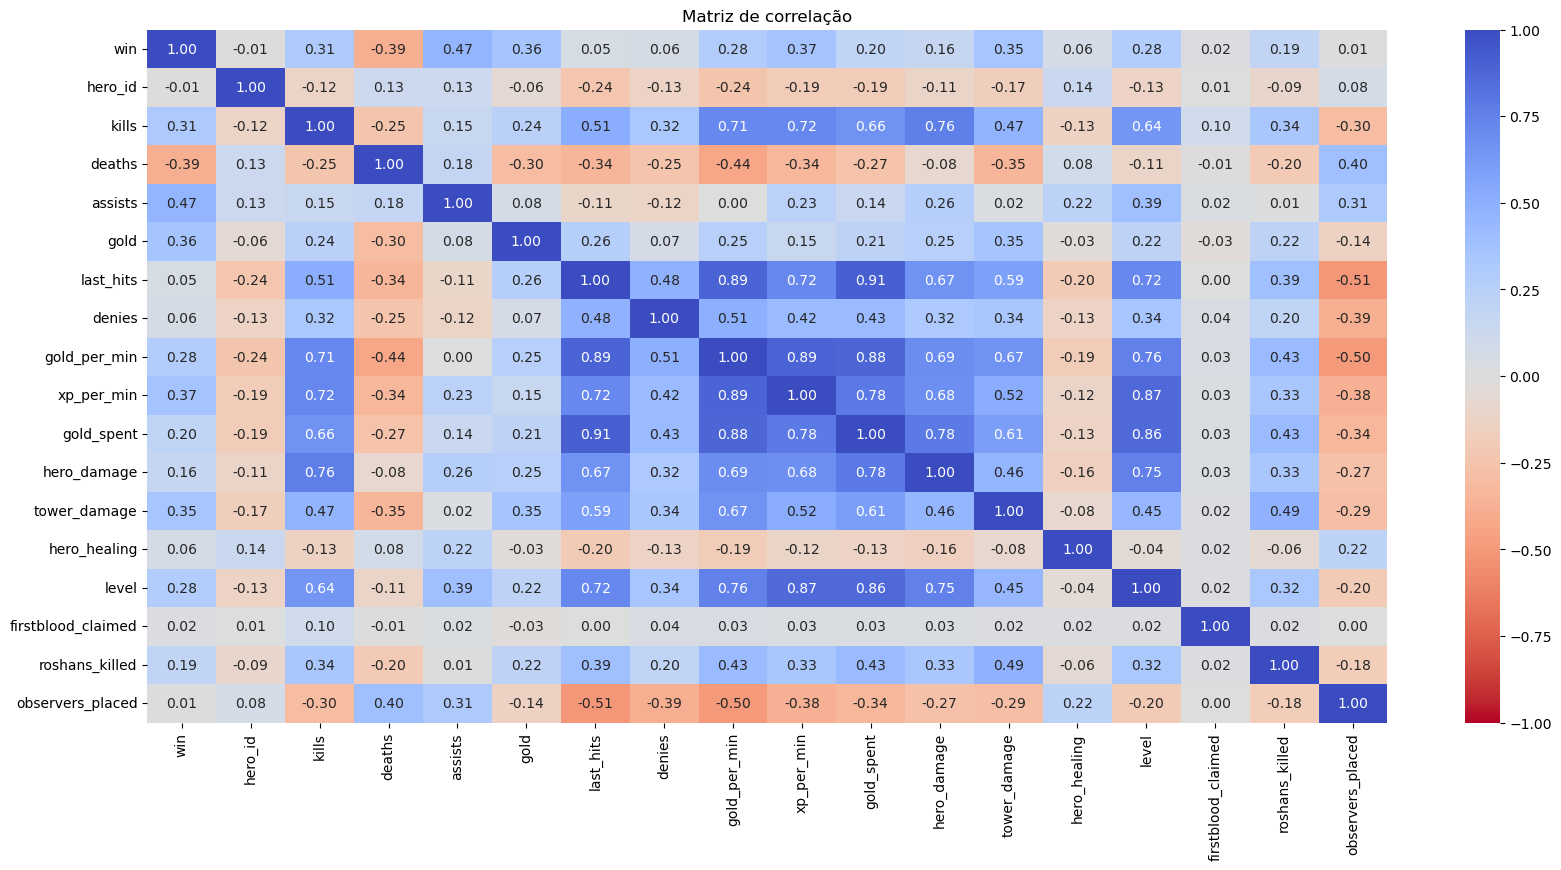

In [103]:
plt.figure(figsize=(20,9))
sns.heatmap(dota_data.corr(), cmap="coolwarm_r", vmin=-1, annot=True, fmt=".2f")
plt.title("Matriz de correlação")
plt.show()

In [104]:
#sns.pairplot(dota_data)
#plt.suptitle('Pairplot', y=1.05)

In [105]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dota_data = pd.DataFrame(ss.fit_transform(dota_data), columns=dota_data.columns)

In [106]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(dota_data)

plt.figure(figsize=(20,12))
sns.scatterplot(x=pca_data[:,0], y=pca_data[:,1], color="crimson")
plt.show()

/home/higoreller/miniconda3/envs/clustering-validation-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/higoreller/miniconda3/envs/clustering-validation-env/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


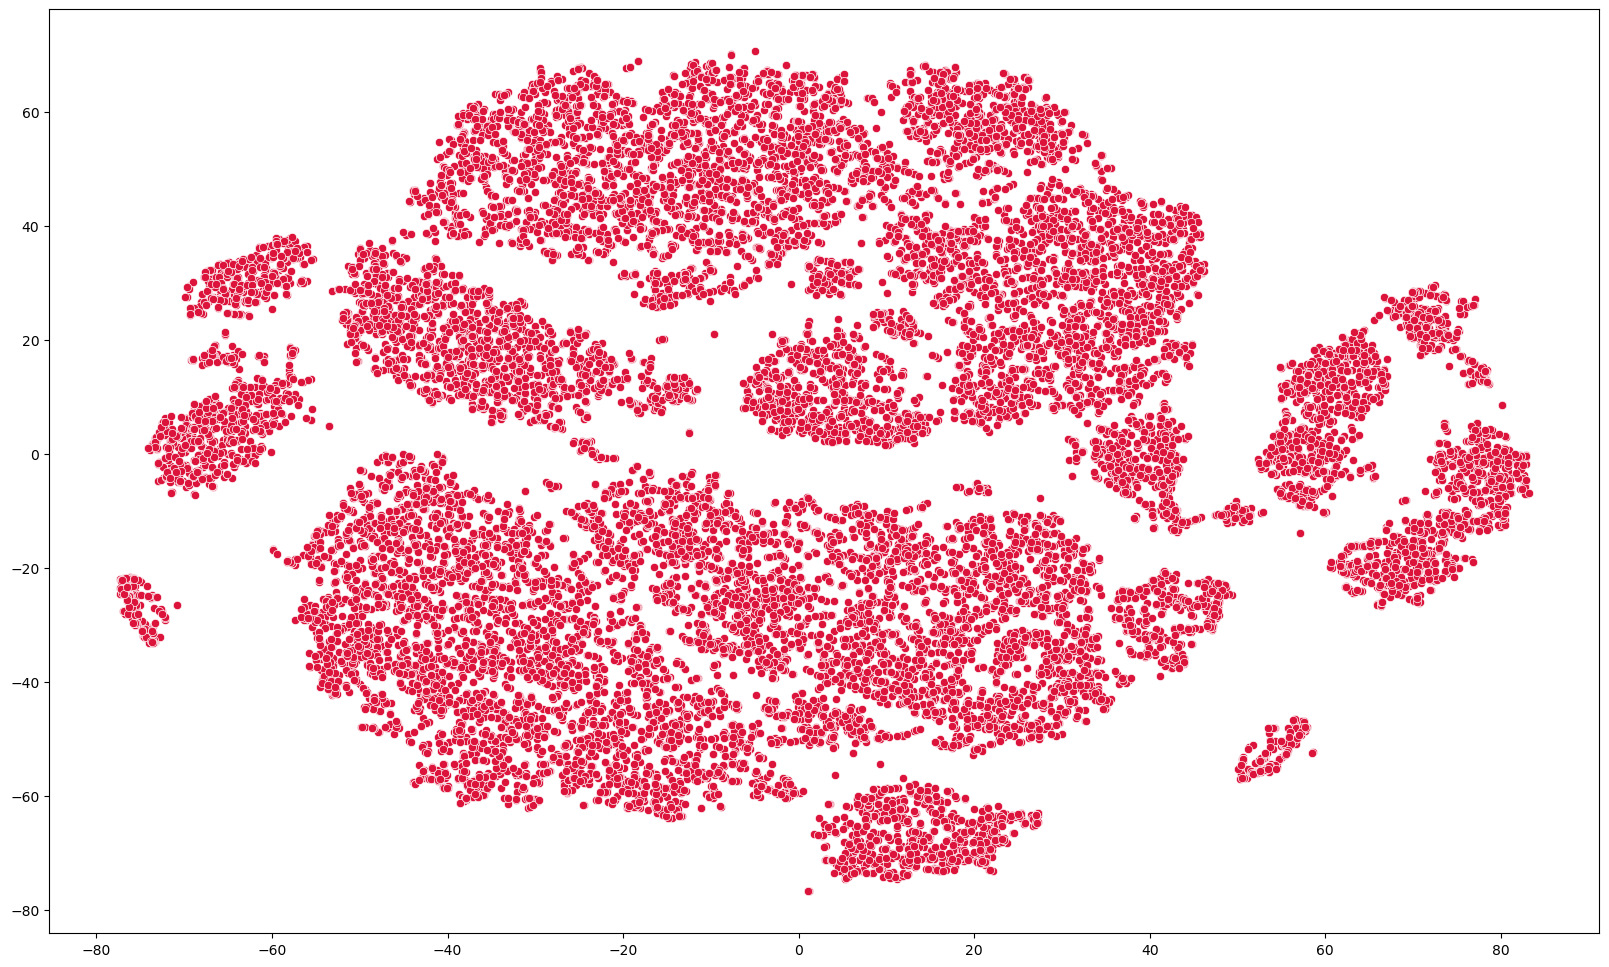

In [107]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
tsne_data = tsne.fit_transform(dota_data)

plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], color="crimson")
plt.show()

In [108]:
from itertools import product
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

eps_values = np.arange(1.9,8,12.5) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

print(DBSCAN_params)

no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(dota_data)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(dota_data, DBS_clustering.labels_))
    


[(1.9, 3), (1.9, 4), (1.9, 5), (1.9, 6), (1.9, 7), (1.9, 8), (1.9, 9)]


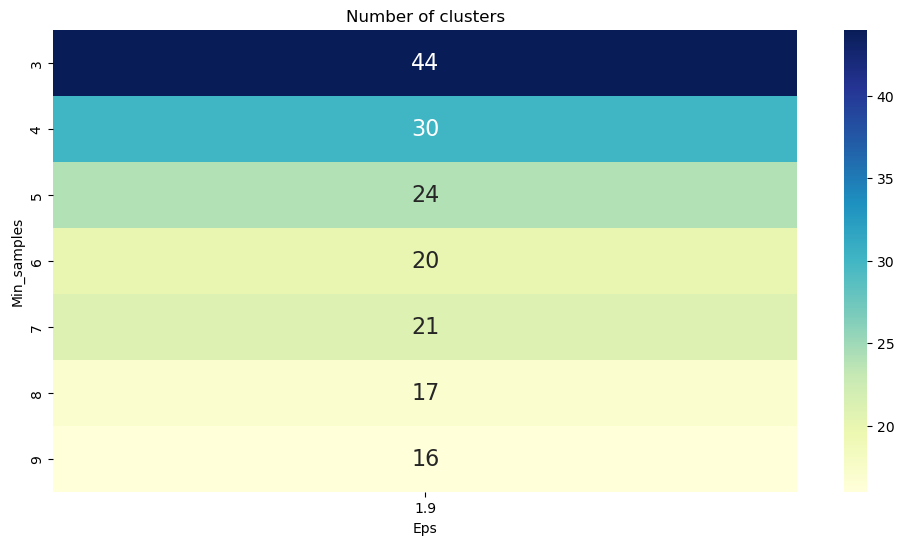

In [109]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
plt.show()

In [154]:
DBS_clustering = DBSCAN(eps=2, min_samples=3).fit(dota_data)

DBSCAN_clustered = dota_data.copy()
DBSCAN_clustered.loc[:,'Cluster'] = DBS_clustering.labels_ # append labels to points
DBSCAN_clust_sizes = DBSCAN_clustered.groupby('Cluster').size().to_frame()
DBSCAN_clust_sizes.columns = ["DBSCAN_size"]
DBSCAN_clust_sizes

DBSCAN_size
Cluster             
-1              1329
 0              6637
 1              1271
 2               500
 3              8017
 4               759
 5               175
 6               114
 7               604
 8               176
 9               183
 10               35
 11               26
 12                4
 13                3
 14               15
 15                3
 16                4
 17                6
 18                6
 19               11
 20                3
 21                4
 22                4
 23                3
 24                3
 25                3
 26                3
 27                3
 28                8
 29                3
 30                3
 31                3
 32                3
 33                3
 34                3

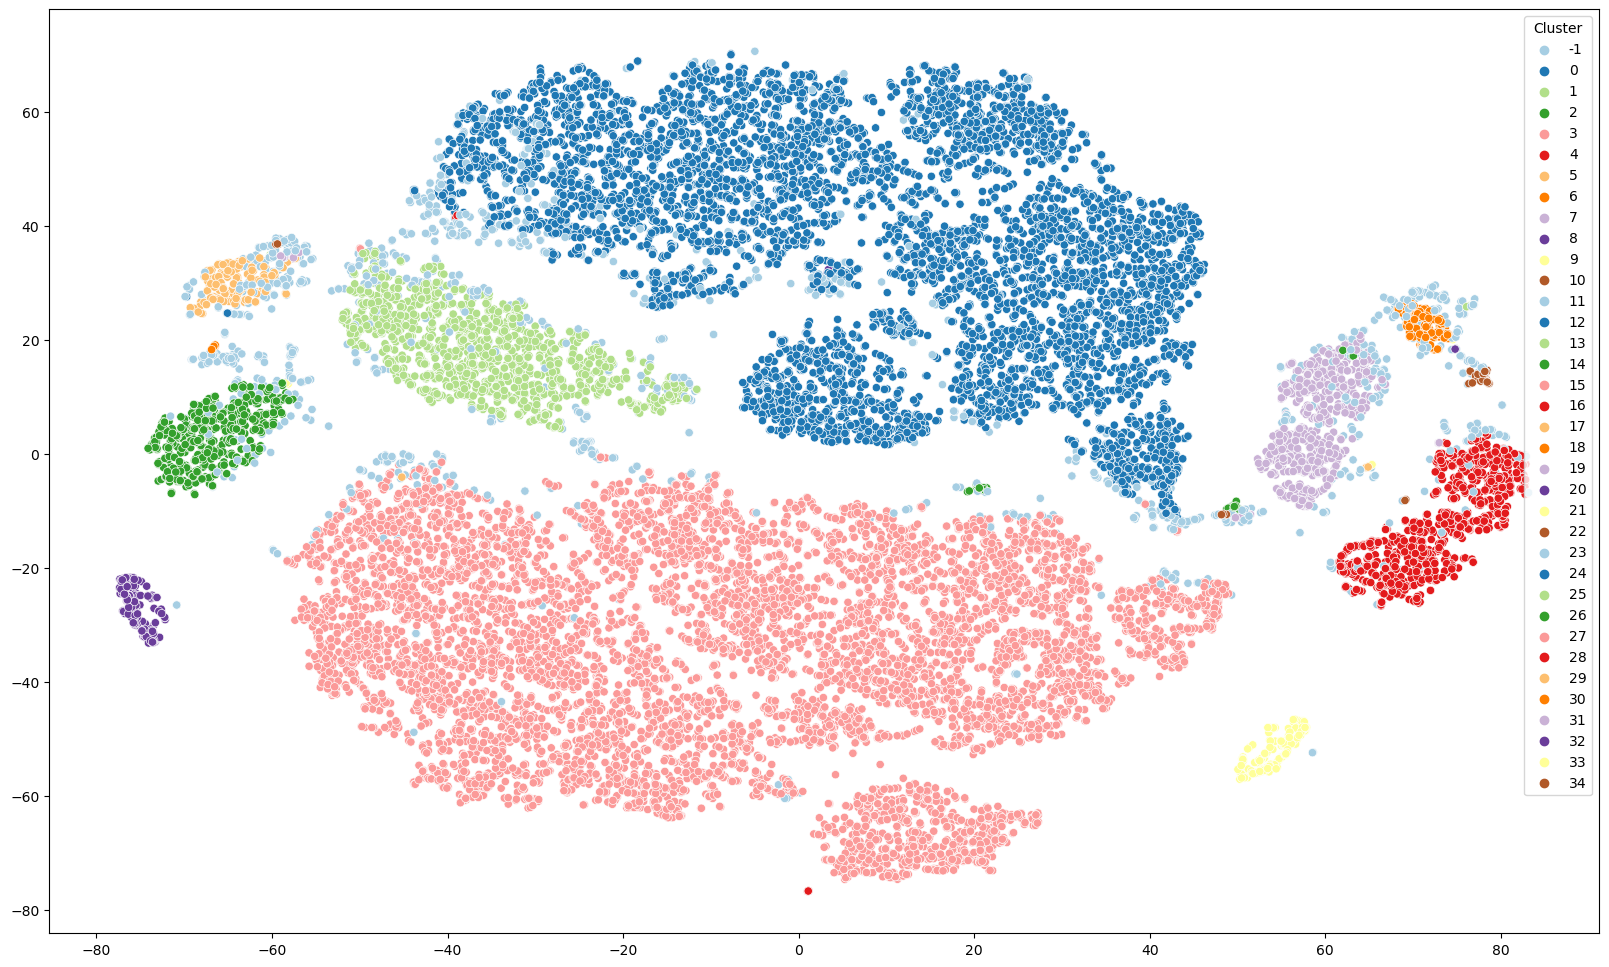

In [155]:
DBSCAN_clustered['Cluster']
len(set(DBSCAN_clustered['Cluster']))

plt.figure(figsize=(20,12))
sns.scatterplot(x=tsne_data[:,0], y=tsne_data[:,1], hue=DBSCAN_clustered['Cluster'], palette="Paired")
plt.show()